# ANN & MNIST

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
train_x[0]

(28, 28)

id = 4955
다음 그림은 숫자 2 입니다.


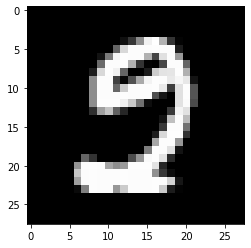

In [23]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [24]:
train_x.shape

(60000, 28, 28)

In [25]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [26]:
train_x.shape

(60000, 784)

* min-max scaling

In [27]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [ ]:
# max_num = train_x.max()

# train_x = train_x/max_num
# test_x = test_x/max_num

In [29]:
max_n, min_n = train_x.max(), train_x.min()

max_n, min_n

(255, 0)

In [30]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [31]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [32]:
train_y.shape

(60000,)

In [33]:
from tensorflow.keras.utils import to_categorical

In [34]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [35]:
len_y = len(set(train_y))

len_y

10

In [36]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [37]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [38]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [39]:
### Sequential API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 선언 : Sequential()
model = keras.models.Sequential()

# 3. 레이어 조립 : .add()
model.add( keras.layers.Input(shape=(784,)) )
model.add( keras.layers.Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.01) )

In [40]:
### Functional API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(784,))
ol = keras.layers.Dense(10, activation='softmax')(il)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer=keras.optimizers.Adam(0.01) )

* Early Stopping

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
es = EarlyStopping(monitor='val_loss', # 관측 대상
                   min_delta=0,        # 최소한 나빠지지 않으면 괜찮아
                   patience=5,         # 성능 개선되지 않는 걸 얼마나 참을래?
                   verbose=1,
                   restore_best_weights=True # 학습이 멈췄을 때, 최적의 가중치로 전환해줌
                   )

In [43]:
model.fit(train_x, train_y, epochs=50, verbose=1,
          validation_split=0.2,    # Train data의 20%를 Validation data로!
          callbacks=[es]           # Early Stopping 적용
          )

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8932 - val_loss: 0.3230 - val_accuracy: 0.9134
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.9072 - val_loss: 0.3114 - val_accuracy: 0.9193
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3352 - accuracy: 0.9123 - val_loss: 0.3490 - val_accuracy: 0.9091
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3290 - accuracy: 0.9115 - val_loss: 0.3427 - val_accuracy: 0.9098
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3228 - accuracy: 0.9143 - val_loss: 0.3799 - val_accuracy: 0.9050
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3210 - accuracy: 0.9150 - val_loss: 0.3571 - val_accuracy: 0.9102
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3181 - accuracy: 0.9166 - val_loss: 0.3502 - val_accuracy:

In [45]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 92.03%
테스트 정확도 : 91.67%


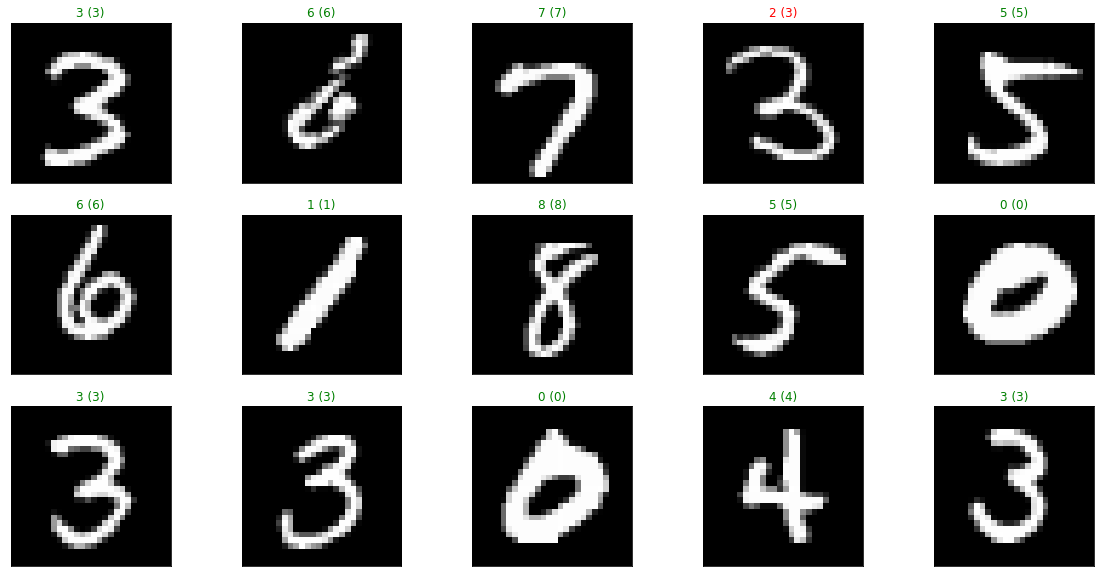

In [48]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 5495
다음 그림은 숫자 8 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  1. 51.  0.  2.  0.  3. 41.  0.]
틀렸어요


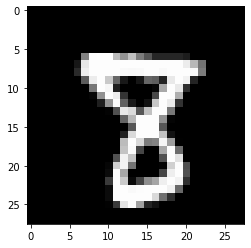

In [53]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [54]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.3220 - accuracy: 0.9167


[0.3219905197620392, 0.916700005531311]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [55]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [56]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [59]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2270 - accuracy: 0.9308 - val_loss: 0.1115 - val_accuracy: 0.9679
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0985 - accuracy: 0.9696 - val_loss: 0.0989 - val_accuracy: 0.9697
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.1247 - val_accuracy: 0.9647
Epoch 4/50
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0531 - accuracy: 0.9834 - val_loss: 0.0927 - val_accuracy: 0.9738
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0983 - val_accuracy: 0.9728
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.1086 - val_accuracy: 0.9708
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0957 - val_accurac

In [61]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.63%
테스트 정확도 : 97.50%


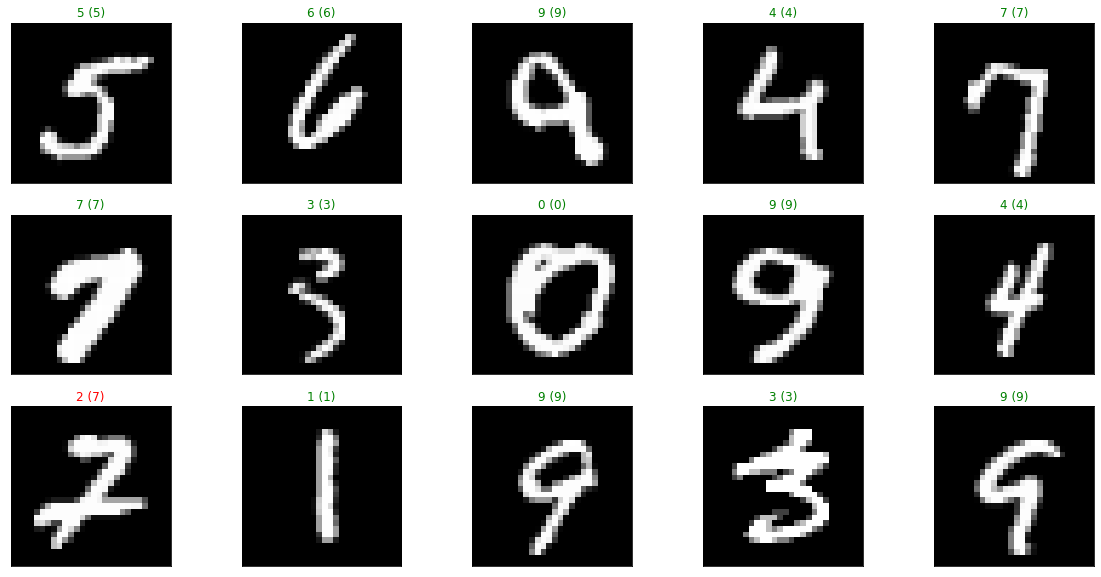

In [62]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 6023
다음 그림은 숫자 3 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0.  0.  1.  0.  5.  0.  0. 92.  0.]
틀렸어요


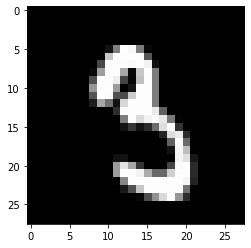

In [68]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)